In [1]:
# task 3, 4
import numpy as np
from scipy.optimize import fsolve, broyden2
import matplotlib.pyplot as plt

def equations(p):
    x, y = p
    return np.power(x,2) - np.power(y,2) + 3*x*np.power(y,3) - 2*np.power(x,2) * np.power(y,2) + 2*x - 3*y - 5, \
           3*np.power(y,3) - 2*np.power(x,2) + 2*np.power(x,3)*y - 5*np.power(x,2)*np.power(y,2) + 5

solv = set()
for x, y in zip(np.arange(-70, 70, 0.1), np.arange(-70, 70, 0.1)):
    xb, yb = x, y
    (x, y), info, ier, mesg = fsolve(equations, (x, y), full_output=True)
    if ier == 1:
        solv.add((int(x*10**7) / 10**7, int(y*10**7) / 10**7, ier))

resx, resy = [], []
for x, y in zip(np.arange(-56, -50, 0.1), np.arange(-56,-50,0.1)):
    try:
        xb, yb = broyden2(equations, (x,y))
        if round(xb, 3) not in resx and round(yb, 3) not in resy:
            solv.add((int(xb*10**8) / 10**8, int(yb*10**8) / 10**8, 1))
            resx.append(round(xb, 3))
            resy.append(round(yb, 3))
    except Exception:
        pass
del resx
del resy

for i, item in enumerate(list(solv), 1):
    solvation = 'real' if item[2] == 1 else 'wrong'
    print(f'{i}) {item[0:2]}, solvation: {solvation}')

1) (-3.65308006, -0.27476346), solvation: real
2) (1.3756871, -0.1747579), solvation: real
3) (2.4943565, 0.7083175), solvation: real
4) (2.2177536, 0.6101939), solvation: real
5) (1.273302, 1.6620391), solvation: real


In [21]:
# task 5, 6
from sympy import *
init_printing()

f0, g0 = 0, 1
fd0, gd0 = g0/2, 2 - 2*f0
eps = 0.00001
x = np.linspace(0,20, int(1/eps))
f = np.array([f0,])
g = np.array([g0,])
solutions = set()
sol_x = []

for i in range(1, x.shape[0]):
    f_n = f0 + fd0 * (x[i] - x[i-1])
    g_n = g0 + gd0 * (x[i] - x[i-1])
    if abs(f_n - g_n) < eps*50:
        if round(x[i], 2) not in sol_x:
            solutions.add((int(x[i] * 10**8) / 10**8, int(f_n*10**8) / 10**8))
            sol_x.append(round(x[i], 2))
    f = np.append(f, f_n)
    g = np.append(g, g_n)
    f0 = f_n
    g0 = g_n
    fd0 = g_n / 2
    gd0 = 2 - 2*f_n
del sol_x

In [23]:
solutions

In [24]:
solutions_ = {i[0]: i[1] for i in list(solutions)}

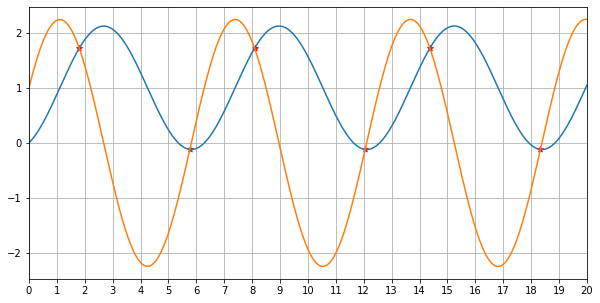

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(x,f)
plt.plot(x,g)
plt.scatter(solutions_.keys(), solutions_.values(), c='r', marker='*')
plt.grid()
plt.xticks(np.arange(0, 21))
plt.xlim([0., 20.])
plt.show()

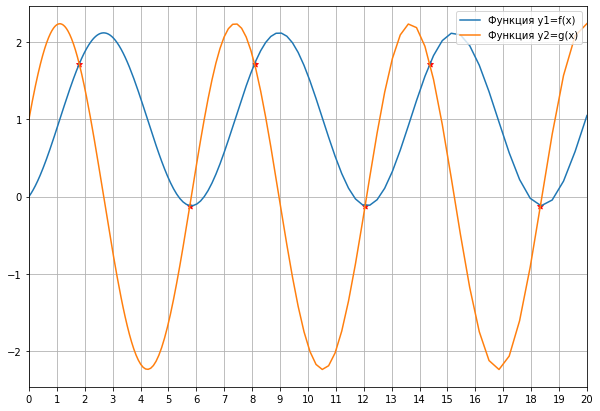

In [26]:
from scipy.interpolate import Akima1DInterpolator
# many discrete points in f 

plt.figure(figsize=(10,7))
sx=np.log10(x+1e-8)
xi_ = np.linspace(sx.min(),sx.max(), num=1000)
xi = 10**(xi_)

yi = Akima1DInterpolator(sx, f)(xi_)
plt.plot(xi,yi, label="Функция y1=f(x)")

yii = Akima1DInterpolator(sx, g)(xi_)
plt.plot(xi,yii, label='Функция y2=g(x)')

plt.scatter(solutions_.keys(), solutions_.values(), c='r', marker='*')

plt.legend()
plt.grid()
plt.xlim([0., 20.])
plt.xticks(np.arange(0, 21))

plt.show()

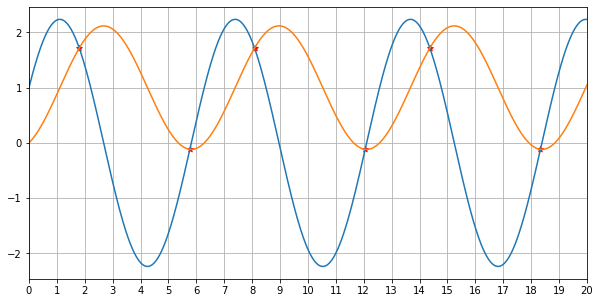

In [27]:
# assume g(x)=2sinx + cosx and f(x)=1/2(sinx - 2cosx + 2)
plt.figure(figsize=(10, 5))
plt.plot(x,  2*np.sin(x) + np.cos(x))
plt.plot(x, (np.sin(x) - 2*np.cos(x) + 2)/2)
plt.scatter(solutions_.keys(), solutions_.values(), c='r', marker='*')
plt.grid()
plt.xticks(np.arange(0, 21))
plt.xlim([0., 20.])
plt.show()

In [28]:
def equations(p):
    x = p
    return 2*np.sin(x) + np.cos(x) - 1/2*(np.sin(x) - 2*np.cos(x) + 2)

solv = set()
for x in np.arange(0, 20, 2):
    xs, info, ier, mesg = fsolve(equations, x, full_output=True)
    if ier == 1:
        solv.add((int(xs*10**7) / 10**7, ier))
solv

In [34]:
s = []
for tup in list(solv):
    x, _ = tup
    if x >=0 and x<=20:
        s.append((x, 2*np.sin(x) + np.cos(x)))
s